# 1.Обозначение данных
#### Напряжение и токи
- Uin - напряжение в сети, В
- Iin - ток из сети, А (значения < 0 - возврат энергии в сеть)
- Irt - ток на тормозных реостатах суммарный, А
- In - ток нагрузки суммарный для всех двигателей, А (значения < 0 - генерация при рекуперативном торможении)
- Is - ток в накопитель, А (значения > 0 - заряд накопителя)


#### Энергия
- dEe - Потребление электрической энергии из сети, Дж (значения < 0 - возврат энегии в сеть) $$dEe_i = Uin_i * In_i * dt_i$$
- dEk - Изменение кинетической энергии, Дж $$dEk_i = \frac{m*(V_i^2 - V_{i-1}^2)}{2}$$ 
- dEn - Энергия потребленная нагрузкой , Дж $$dEg_i = In_i * Uin_i * dt_i, In_i < 0$$
- dEs - Изменение энергии запасенной в накопителе, Дж (рассчитывается с учетом тока заряда Is_in_max и разряда Is_out_max и максимальной емкости накопителя Es_max)
    $$ dEs_i = Uin_i * Is_i, для Es_{i-1}+dEs_i < Es_{max}, иначе "Es_{max}"$$
- Es - Остаток энергии в накопителе, Дж (рассчитываетя как кумулятивная сумма dEs) $$\Sigma dEs$$

#### Ограничения по току
- Is_in_max - максимальный ток потребляемый накопителем от генератора в режиме накопления энергии
- Is_out_max - максимальный ток отдаваемый накопителем в режиме использования сохраненной энергии

#### Параметры накопителя энергии
- Us_max - максимальное напряжение на батарее накопителя, зависит от количества стандартных модулей в батарее
- Us_min - минимальное напряжение на батарее накопителя, зависит от DC-DC преобразователя
- Cs - емкость накопителя, Ф

#### Время, скорость, ускорение
- tsec - абсолютное время, сек.
- dt - время от предыдущего отсчета, сек $$ dt_i = tsec_i - tsec_{i-1} $$
- speed - скорость, км/ч
- accel - ускорение, м/с2

#### Индикаторы режима
- Is_mode
- Is_cycle - номер цикла, значение постоянно внутри одного режима работы. Отдельные счетчики для каждого режима работы
- strelka - сигнал "Стрелка" (1-на одной тележке, 2-на двух тележках)
- brake - сигнал торможения (1-на одной тележке, 2-на двух тележках)
- vpered
- hod
- pos

#### Суффиксы в именах показателей
- _est - ожидаемое значение в результате моделирования (Is_est, Iin_est, Irt_est, dEs_est, dEe_est, Es_est)
- _ltd - значение расчитанные с учетом ограничений только по токам (Is_ltd)

#### Показатели при описании массива значений
- count - количество значений в массиве
- mean - среднеее значение
- std - среднеквадратичное отклонение
- min - минимальное значение
- 25% - максимальное значение из 25% минимальных значений
- 50% - максимальное значение из 50% минимальных значений
- 75% - максимальное значение из 75% минимальных значений
- max - максимальное значение

# 2. Подготовка данных

In [1]:
%matplotlib inline
%gui
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Вывод не более 15 строк
pd.set_option('display.max_rows', 15)

#Три десятичных знака, по умолчанию
pd.options.display.float_format = '{:.3f}'.format

# Включение вывода нескольких результатов от одной ячейки
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Размер области построения графика
plt.rcParams['figure.figsize'] = (15, 4)
print("Внешние модули инициализированы")

Внешние модули инициализированы


In [2]:
# Загрузка данных CSV
field_list = ['rdate', 'rtime', 'In1', 'In2', 'Irt1', 'Irt2', 'Irms1', 'Irms2', 'pos1', 'pos2', 'U_AB', 'Ibpn', 'I_AB',
             'razrAVDU1', 'razrAVDU2', 'AVDU1', 'AVDU2', 'vklAI1', 'vklAI2', 'vklOTD1', 'vklOTD2', 'vklON1', 'vklON2',
             'hod1', 'hod2', 'brake1', 'brake2', 'vpered1', 'vpered2', 'strelka1', 'strelka2', 'Uin1', 'Uin2', 
              'speed1', 'speed2', 'tsec'];
#file_name = u"C:\\Users\\Denis\\Box Sync\\DK\\KERS-T\\Tracks\\EPRO\\Data4x55.csv";
file_name = u"Data4x55.csv";
ds = pd.read_csv(file_name, ';', names=field_list, header=1, decimal=',');
print("Исходные данные загружены. Кол-во: {:,.0f} строк, размер {:,.1f} Мб".format(ds.tsec.count(), ds.size/1024**2))

Исходные данные загружены. Кол-во: 235,025 строк, размер 8.1 Мб


In [3]:
# Удаление не используемых полей

deleted_fields = ['U_AB', 'Ibpn', 'I_AB', 'razrAVDU1', 'razrAVDU2', 'AVDU1', 'AVDU2', 
                  'vklAI1', 'vklAI2', 'vklOTD1', 'vklOTD2', 'vklON1', 'vklON2', 'Irms1', 'Irms2'];
for field in deleted_fields:
    del ds[field];

print("Удалены неиспользуемые поля. Новый размер данных {:,.1f} Мб".format(ds.size/1024**2))

Удалены неиспользуемые поля. Новый размер данных 4.7 Мб


In [4]:
# Суммирование сигналов торможения
ds['brake'] = ds.brake1 + ds.brake2; del ds['brake1']; del ds['brake2'];

# Суммирование сигналов "вперед"
ds['vpered'] = ds.vpered1 + ds.vpered2; del ds['vpered1']; del ds['vpered2'];

# Суммирование сигналов "ход"
ds['hod'] = ds.hod1 + ds.hod2; del ds['hod1']; del ds['hod2'];

# Суммирование сигналов "позиция"
ds['pos'] = ds.pos1 + ds.pos2; del ds['pos1']; del ds['pos2'];

# Суммирования сигналов "стрелка"
ds['strelka'] = ds.strelka1 + ds.strelka2; del ds['strelka1']; del ds['strelka2'];

# Объединение полей даты и времени
#ds['tstr'] = ds.rdate + ' ' + ds.rtime; 
del ds['rdate']; del ds['rtime'];
#==============================================================================================

# Суммирование токов потребления
ds['Iin'] = ds.In1 + ds.In2; del ds['In1']; del ds['In2'];

# Суммирование токов тормозных реостаток
ds['Irt'] = ds.Irt1 + ds.Irt2; del ds['Irt1']; del ds['Irt2'];

print("Объеденены параметры: brake, vpered, hod, pos, strelka, Iin, Irt. Новый размер данных {:,.1f} Мб".format(ds.size/1024**2))

Объеденены параметры: brake, vpered, hod, pos, strelka, Iin, Irt. Новый размер данных 2.7 Мб


In [5]:
# Расчет speed - усреднение данных скорости с двух тележек с восстановлением данных
ds['speed'] = 0;
ds.loc[ds.speed1==0, 'speed'] = ds.speed2;
ds.loc[ds.speed2==0, 'speed'] = ds.speed1;
ds.loc[ds.speed==0,  'speed'] = (ds.speed1 + ds.speed2) / 2.0;
del ds['speed1']; del ds['speed2'];
print("Обьеденены показатели скорости")

Обьеденены показатели скорости


In [6]:
# Расчет Uin - усреднение напряжения от двух тележек с восстановлением данных
ds['Uin'] = 0;
ds.loc[ds.Uin1==0, 'Uin'] = ds.Uin2;
ds.loc[ds.Uin2==0, 'Uin'] = ds.Uin1;
ds.loc[ds.Uin==0,  'Uin'] = (ds.Uin1 + ds.Uin2) / 2;
del ds['Uin1']; del ds['Uin2'];
print("Объеденены показатели Uin")

Объеденены показатели Uin


In [7]:
# Расчет dt - время от предыдущей записи
# Расчет accel - ускорения от предыдущей записи
# Расчет dEk - изменение кинетической энергии

m = 23000; # Полная масса трамвая
ds['dt'] = ds.tsec.rolling(2).agg(lambda x: x[1] - x[0]); ds.ix[0, 'dt'] = 0
ds['dEk'] = ds.speed.rolling(2).agg(lambda x: (x[1]**2 - x[0]**2)*m/3.6**2/2)
ds['accel'] = ds.speed.rolling(2).agg(lambda x: (x[1] - x[0])/3.6) / ds.dt
print("Рассчитаны показатели dt, dEk, accel")

Рассчитаны показатели dt, dEk, accel


In [8]:
# Расчет тока нагрузки
ds['In'] = ds.Iin - ds.Irt

# расчет dEe - энергия полученная от сети, для возвращенной энергии знак "-"
# колонки электрической энергии
ds['dEe'] = ds.Uin * ds.Iin * ds.dt

# Расчет dEn - энергия потребленная нагрузкой
ds['dEn'] = ds.Uin * ds.In * ds.dt

print("Рассчитаны показатели In, dEe, dEn")

Рассчитаны показатели In, dEe, dEn


In [9]:
# Найстрока форматов вывода
fmt_f0 = '{:,.0f}'; fmt_f1 = '{:,.1f}'; fmt_f2 = '{:,.2f}';

energy_fmt = fmt_f0
current_fmt = fmt_f0

fmt = {'tsec': fmt_f2, 'dt':fmt_f1, 'speed':fmt_f1, 'accel':fmt_f1, 'Uin':fmt_f0, 
       'Iin':current_fmt, 'Irt':current_fmt, 'In':current_fmt, 
       'Is':current_fmt,
       'dEe':energy_fmt, 'dEk':energy_fmt, 'dEn':energy_fmt, 
       
       'Iin_est': current_fmt, 'Is_est': current_fmt, 
       'Es_est': energy_fmt, 'dEs_est': energy_fmt, 'dEs_tld': energy_fmt,
       'Ee_peak': energy_fmt, 'Es_est_last': energy_fmt,

       'speed_first':fmt_f1, 'speed_last':fmt_f1, 
       'accel_mean':fmt_f1, 'accel_max':fmt_f1,
       
       'Iin_mean':current_fmt, 'Iin_max':current_fmt, 'Uin':fmt_f0, 
       'In_mean':current_fmt, 'In_max':current_fmt,
       'Irt_mean':current_fmt, 'Irt_max':current_fmt,
       'Is_mean':current_fmt, 'Is_max':current_fmt
} 

def right_align(df):
    return df.set_properties(**{'text-align':'right'})

def show(df):
    return df.style.set_properties(**{'text-align':'right'}).format(fmt)
print("Форматы вывода настроены. Использовать: show(<DataFrame>)")

Форматы вывода настроены. Использовать: show(<DataFrame>)


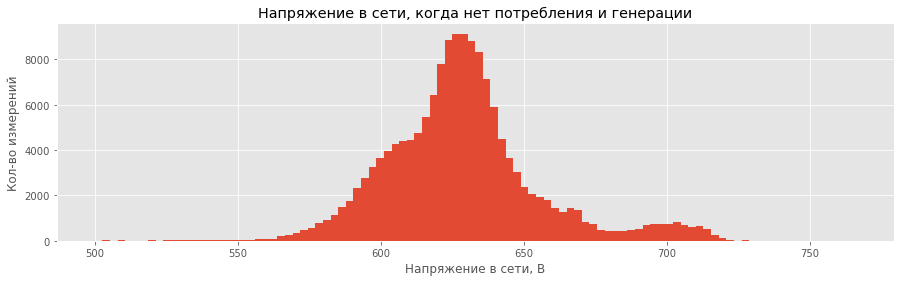

In [10]:
ds[(ds.Iin==0) & (ds.In==0) & (ds.Uin>500)].Uin.hist(bins=100);
plt.title("Напряжение в сети, когда нет потребления и генерации");
plt.xlabel("Напряжение в сети, В");
plt.ylabel("Кол-во измерений");

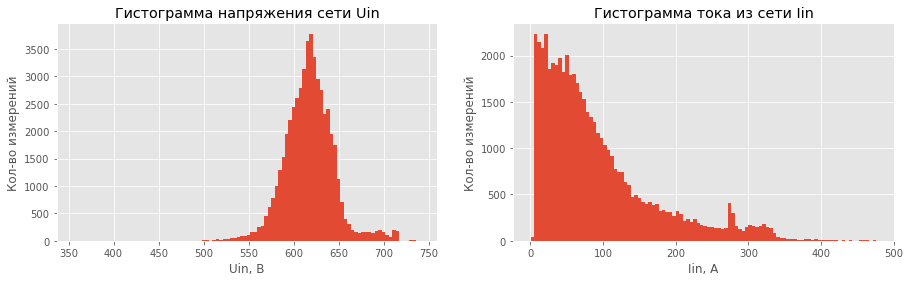

In [11]:
plt.subplot(121);
plt.title("Гистограмма напряжения сети Uin");
ds[(ds.Iin>0) & (ds.Uin>100)].Uin.hist(bins=100);
plt.xlabel("Uin, В");
plt.ylabel("Кол-во измерений");

plt.subplot(122);
plt.title("Гистограмма тока из сети Iin");
ds[(ds.Iin>0) & (ds.Uin>100)].Iin.hist(bins=100);
plt.xlabel("Iin, A");
plt.ylabel("Кол-во измерений");

In [12]:
print("Показатели при питании от сети");
ds.loc[ds.Iin>0, ['accel', 'Uin','Iin']].describe().style.format('{:,.1f}')

print("Показатели при генерации");
ds.loc[ds.In<0, ['accel', 'Uin','Iin','Irt', 'In']].describe().style.format('{:,.1f}')

Показатели при питании от сети


Показатели при генерации


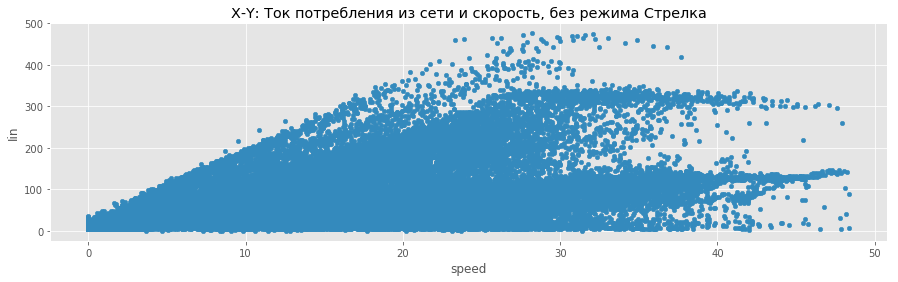

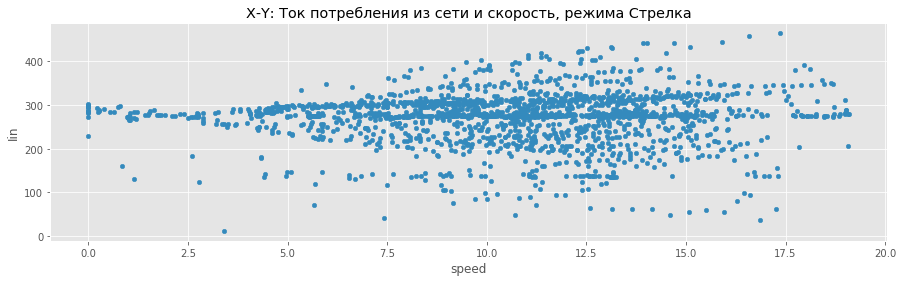

In [13]:
ds[(ds.Uin>100) & (ds.Iin>0) & (ds.strelka==0)].plot.scatter(x='speed', y='Iin')
plt.title("X-Y: Ток потребления из сети и скорость, без режима Стрелка");

ds[(ds.Uin>100) & (ds.Iin>0) & (ds.strelka>0)].plot.scatter(x='speed', y='Iin')
plt.title("X-Y: Ток потребления из сети и скорость, режима Стрелка");

Гистограммы: Ток от двигателей и Напряжение в сети, в режиме рекуперации


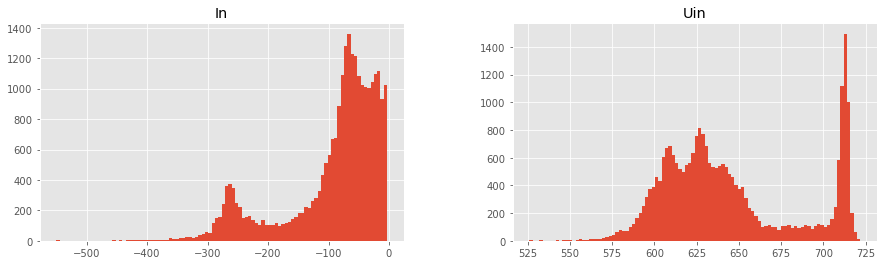

In [14]:
print("Гистограммы: Ток от двигателей и Напряжение в сети, в режиме рекуперации")
ds.loc[ds.Iin<0, ['Uin', 'In']].hist(bins=100);

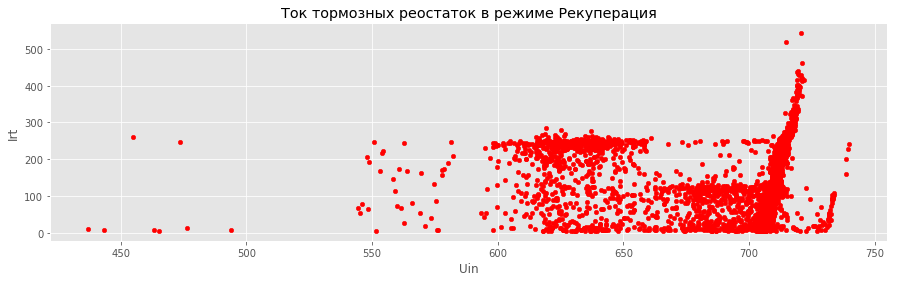

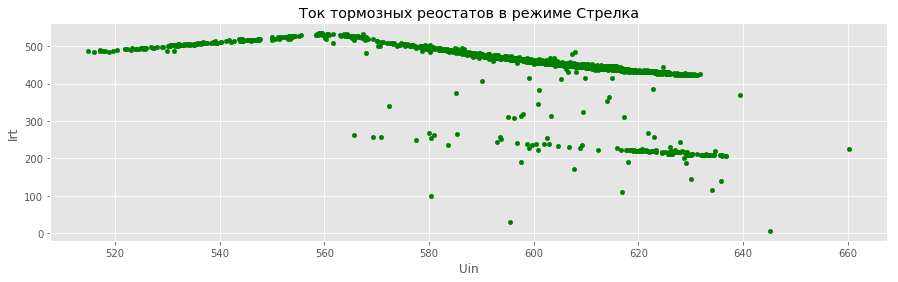

In [15]:
ds[(ds.strelka==0) & (ds.Irt>0) & (ds.Uin>100) ] \
    .plot.scatter(x='Uin', y='Irt', c='r', title="Ток тормозных реостаток в режиме Рекуперация");
ds[(ds.strelka>0) & (ds.Irt>0) & (ds.Uin>100) ] \
    .plot.scatter(x='Uin', y='Irt', c='g', title="Ток тормозных реостатов в режиме Стрелка");

# 3. Энергетически показатели (за смену)

In [16]:
#E_k = 1.0 / 10**6   # Коэфф.пересчета Дж в единицы энергии
#E_m = 'МДж'
E_k = 1.0 / 1000 / 3600
E_m = 'кВт*час'

Ee_total =  ds[ds.dEe>0].dEe.sum()    # Потребление энергии из сети
Er_total = -ds[ds.dEe<0].dEe.sum()    # Возврат энергии в сеть
Eg_total = -ds[ds.dEn<0].dEn.sum()    # Генерация энергии        
Ek_total =  ds[ds.dEk>0].dEk.sum()    # Прирост кинетической энергии
Ein_total = Ee_total + Eg_total

cond = (ds.Irt > 0) & (ds.strelka == 0)
Ertn_total = (ds[cond].Irt * ds[cond].Uin * ds[cond].dt).sum()

cond = (ds.Irt > 0) & (ds.strelka > 0)
Erts_total = (ds[cond].Irt * ds[cond].Uin * ds[cond].dt).sum() 

print("Поступление энергии:")
print(" - энергия потребленная из сети             {:6.1f} {:s}".format( Ee_total * E_k, E_m ))
print(" - генерация энергии (из кинет. и потенц.)  {:6.1f} {:s}".format( Eg_total * E_k, E_m ))
print("-------------------------------------------------------")
print("ИТОГО оборот энергии за сутки               {:6.1f} {:s}".format( (Ee_total + Eg_total) * E_k, E_m ))
print("-------------------------------------------------------")
print("Использование энергии:")
print(" - увеличение кинетической энергии (разгон) {:6.1f} {:s}".format( Ek_total * E_k, E_m ))
print(" - тепло на реостатах при торможении        {:6.1f} {:s}".format( Ertn_total * E_k, E_m ))
print(" - тепло на реостатах в режиме Стрелка      {:6.1f} {:s}".format( Erts_total * E_k, E_m ))
print(" - энергия возвращенная в сеть              {:6.1f} {:s}".format( Er_total * E_k, E_m ))
print(" - увеличение потенц.эн. + потери + прочее  {:6.1f} {:s}".format( (Ein_total - Er_total - Ek_total- Erts_total - Ertn_total) * E_k, E_m))

Поступление энергии:
 - энергия потребленная из сети              200.7 кВт*час
 - генерация энергии (из кинет. и потенц.)   135.5 кВт*час
-------------------------------------------------------
ИТОГО оборот энергии за сутки                336.2 кВт*час
-------------------------------------------------------
Использование энергии:
 - увеличение кинетической энергии (разгон)  135.6 кВт*час
 - тепло на реостатах при торможении          59.7 кВт*час
 - тепло на реостатах в режиме Стрелка        36.9 кВт*час
 - энергия возвращенная в сеть                61.8 кВт*час
 - увеличение потенц.эн. + потери + прочее    42.2 кВт*час


# 4. Моделирование работы системы рекуперации

## 4.1 Подготовка данных

In [17]:
# Создание копии DataFrame для моделирования
mds = ds.copy()

# Расчет тока накопителя без ограничений Is 
mds['Is'] = mds.Irt - mds.Iin          # Забираем все что теряется на тормозном реостате и все что возвращается в сеть
mds.loc[mds.strelka>0, 'Is'] = ds.Irt  # В режиме "Стрелка" забираем весь ток с тормозного реостата

mds['dEs_all'] = mds.Is * mds.Uin * mds['dt']

# Нумерация циклов заряда/разряда накопителя
mds.loc[mds.Is==0, 'Is_mode'] = 0
mds.loc[mds.Is<0 , 'Is_mode'] = 1
mds.loc[mds.Is>0 , 'Is_mode'] = 2
mds.loc[mds.strelka>0, 'Is_mode'] = 3
Is_cycle = 0
def agg_Is_cycle(x):
    global Is_cycle
    if x[1] != x[0]: Is_cycle += 1
    return Is_cycle    
    
mds['Is_cycle'] = mds.Is_mode.rolling(2).agg(agg_Is_cycle)
print("Циклы работы пронумерованы")
print("Количество циклов работы (останов/заряд/разряд/стрелка)", mds.Is_cycle.max())

def show_mds(ds):
    return ds.style.set_properties(**{'text-align':'right'}).format({
        'tsec':'{:.2f}', 'dt':'{:.2f}', 
        'dEs':'{:,.0f}', 'dEs_ltd':'{:,.0f}', 'dEs_est':'{:,.0f}',
        'dE':'{:,.0f}', 'Es_ltd':'{:,.0f}', 'Es_est':'{:,.0f}'
    })

Циклы работы пронумерованы
Количество циклов работы (останов/заряд/разряд/стрелка) 9859.0


In [18]:
# Функция расчета тока накопителя с учетом ограничений Is_in_max, Is_out_max
# Вычисляет:
#    Is_ltd  - ток накопителя с учетом ограничений по  току заряда (Is_in_max) и току разряда (Is_out_max)

def calc_Is_ltd(d):
    d['Is_ltd'] = d.Is.clip(-Is_out_max, Is_in_max)
    
print ("Функция calc_Is_ltd создана")

Функция calc_Is_ltd создана


## 4.2 Анализ данных в свернутом массиве
- Массив данных свернут по циклам разгон/торможение/стрелка, для ускорения вычислений
- Изменение энергии в накопителе расчитывается с учетом ограничений по емкости и напряжению на накопителе

In [19]:
# Создает DataFrame sds - свернутый по циклам зарядк/разряд из DataFrame mds
# Вычисляет:
#    mds.Is_ltd     - ток накопителя с учетом ограничений через calc_Is_ltd()
#    mds.dEs_ltd    - изменение энергии накопителя = Is_ltd * Uin * dt
#
#    sds.Es_est     - остаток энергии в накопителе с учетом ограничения по емкости (Es_max)
#    sds.dEs_est    - изменение энергии в накопителе с учетом ограничений по току и емкости

def make_sds():
    global mds, sds
    
    calc_Is_ltd(mds)

    # Расчет изменения энергии накопителя с учетом ограничений по Is
    mds['dEs_ltd'] = mds.Is_ltd * mds.Uin * mds['dt']

    # Сворачивание по циклам заряда/разряда
    mds_agg_list = {'Is_mode':'first', 'tsec':'first', 'dt':'sum', 'dEs_ltd':'sum'}
    sds = mds.groupby(['Is_cycle', 'strelka']).agg(mds_agg_list).reset_index()

    # Расчет изменения энергии в накопителе с учетом ограничения по Es_max
    Es_est = []
    dEs_est = []
    Es = 0
    for i in sds.index.values:
        dEs = sds.ix[i, 'dEs_ltd']
        if Es + dEs > Es_max: dEs = Es_max - Es
        if Es + dEs < 0 : dEs = -Es
        Es += dEs
        Es_est.append(Es)
        dEs_est.append(dEs)

    sds['Es_est'] = Es_est
    sds['dEs_est'] = dEs_est
    
print("Функция make_sds создана")

Функция make_sds создана


## 4.2.1 Суммарное накопления/использование энергии

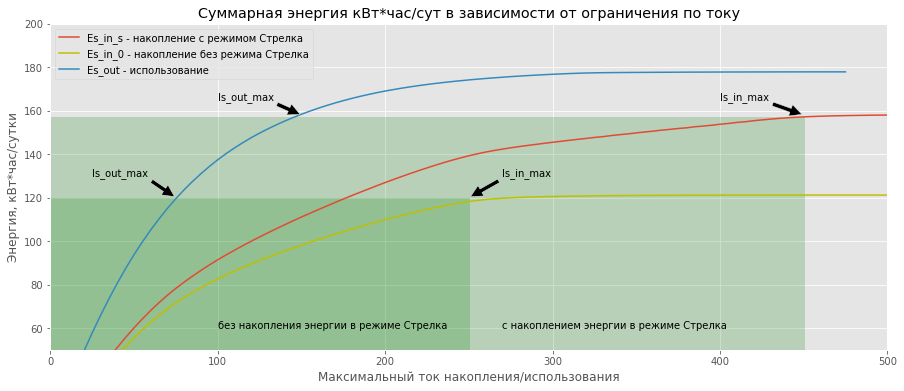

In [20]:
# Накопленная энергия от ограничений по току
plt.rcParams['figure.figsize'] = (15, 6)

def calc_Es4Is_max(d):
    rng = range(0, 601, 5)
    d['Is_cat'] = np.abs(pd.cut(d.Is, rng, labels=rng[:-1]).values)
    d['UT'] = d.Uin * d.dt
    d = d.groupby('Is_cat').agg({'Is':'max', 'dEs_all':'sum', 'UT':'sum'})
    d.dEs_all = d.dEs_all / 3600 / 1000
    d1=d[d.Is>0].sort_values('Is', ascending=True)
    UT_total = d1.UT.sum()
    d1['Es_csum'] = d1.dEs_all.cumsum()
    d1['UT_csum'] = d1.UT.cumsum()
    d1['Es_rest'] = (UT_total - d1.UT_csum) * d1.Is /3600 / 1000
    d1['Es_total'] = d1.Es_csum + d1.Es_rest
    return d1.Es_total

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

Es_in_s = calc_Es4Is_max( mds[mds.Is>0].copy() )
Es_in_s.plot(ax=ax, x='In', y='Es_total', label='Es_in_s - накопление с режимом Стрелка', legend=True);

Es_in_0 = calc_Es4Is_max( mds[(mds.Is>0) & (mds.strelka==0)].copy() )
Es_in_0.plot(ax=ax, x='In', y='Es_total', label='Es_in_0 - накопление без режима Стрелка', legend=True, color='y');

d = mds[mds.Is<0].copy()
d.Is = -d.Is; d.dEs_all = -d.dEs_all
Es_out = calc_Es4Is_max(d)
Es_out.plot(ax=ax, x='Is', y='Es_total', label='Es_out - использование', legend=True);
plt.title("Суммарная энергия кВт*час/сут в зависимости от ограничения по току");
plt.xlabel("Максимальный ток накопления/использования")
plt.ylabel("Энергия, кВт*час/сутки")
plt.ylim((50,200))
plt.xlim((0,500))
ax.add_patch(plt.Polygon([[250,0], [250,120], [0,120], [0,0]], color='g', alpha=0.2));
ax.add_patch(plt.Polygon([[450,0], [450,157], [0,157], [0,0]], color='g', alpha=0.2));
ax.annotate("без накопления энергии в режиме Стрелка", xy=(100,60))
ax.annotate("с накоплением энергии в режиме Стрелка", xy=(270,60))
ax.annotate('Is_out_max', xytext=(100,165), xy=(150,158), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Is_in_max', xytext=(400,165), xy=(450,158), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Is_out_max', xytext=(25,130), xy=(75,120), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Is_in_max', xytext=(270,130), xy=(250,120), arrowprops=dict(facecolor='black', shrink=0.05))

plt.rcParams['figure.figsize'] = (15, 4);

- Необходимые ограничения по токам в режиме накопления (Is_in_max)/использования (Is_out_max) энергии определяются по пересечению прямоугольной зоны с графиками суммарной энергии накопления/использования
- Без накопления энергии в режиме Стрелка, достаточно ограничить тока при накоплении энергии 250А, при использовании энергии 75А. При этом, суточный объем рекуперируемой энергии составит 120 кВт*час
- При накоплении энергии в режиме Стрелка, имеет смысл увеличить ток при накоплении до 450А, а при использовании энергии до 150А. В этом случае, объем рекуперируемой энергии увеличится до 155 кВт*час

In [21]:
E1 = 155
E0 = 120
print("Доп.доход от накопления в режиме Стрелка {:,.0f} тыс.руб/год".format( (E1 - E0) * 365 * 4 / 1000 ))

Доп.доход от накопления в режиме Стрелка 51 тыс.руб/год


## 4.2.2 Моделирование по свернутому массиву (sds)

In [22]:
# Параметры моделирования
Is_in_max  = 450       # Максимальный ток от нагрузки при зарядке накопителя
Is_out_max = 150       # Максимальный ток в нагрузку при разряде накопителя
M_count    = 15        # Количество страндартных модулей 48V x 165F

# Характеристики стандартного модуля СК
M_C = 165.0  # Емкость модуля
M_V = 48.0   # Номинальное напряжение модуля

# Расчетные показатели накопителя
Cs = M_C / M_count     # Емкость батареи, составленной из стандартных модулей 48V 165F
Us_max = M_V * M_count # Номинанльное напряжение батареи, составленной из модулей соединенных последовательно
Us_min = 100           # Минимальное напржение на батарее при разряде
Es_max = Cs / 2 * (Us_max**2 - Us_min**2) 

print("Показатели накопителя энергии\n Cs = {:.1f} Ф \n Es_max = {:,.0f} Дж ({:,.0f} Вт*час) \n Us_max = {:,.0f} В" \
      .format(Cs, Es_max, Es_max/3600, Us_max) )

Показатели накопителя энергии
 Cs = 11.0 Ф 
 Es_max = 2,796,200 Дж (777 Вт*час) 
 Us_max = 720 В


In [23]:
make_sds()

# E_m = 'МДж'      # Отображаемая ед.изм. энергии
# E_k = 1.0/10**6  # Коэф. пересчета в отображаемую единицу  Дж * E_k

E_m = 'кВт*час'      # Отображаемая ед.изм. энергии
E_k = 1.0/1000/3600  # Коэф. пересчета в отображаемую единицу  Дж * E_k

print("")
print("Расчет по циклам заряд/разряд с учетом ограничений по току и емкости накопителя (за сутки):")
print("Доступная для накопления энергии всего         {:,.1f} {:s} в т.ч. рекуперация {:6,.1f} {:s}, стрелка {:5,.1f} {:s}" \
    .format(
    mds[mds.dEs_all  > 0].dEs_all.sum()                     * E_k, E_m, 
    mds[(mds.dEs_all > 0) & (mds.strelka==0)].dEs_all.sum() * E_k, E_m,
    mds[(mds.dEs_all > 0) & (mds.strelka>0)].dEs_all.sum()  * E_k, E_m
))
print("Доступная энергия c учетом ограничения по току {:,.1f} {:s} в т.ч. рекуперация {:6,.1f} {:s}, стрелка {:5,.1f} {:s}" \
    .format(
    mds[mds.dEs_ltd > 0].dEs_ltd.sum()                      * E_k, E_m, 
    mds[(mds.dEs_ltd > 0) & (mds.strelka==0)].dEs_ltd.sum() * E_k, E_m, 
    mds[(mds.dEs_ltd > 0) & (mds.strelka>0)].dEs_ltd.sum()  * E_k, E_m
))
print("Накоплено энергии с учетом емкости накопителя  {:,.1f} {:s} в т.ч. рекуперация {:6,.1f} {:s}, стрелка {:5,.1f} {:s}" \
    .format(
    sds[sds.dEs_est>0].dEs_est.sum()                      * E_k, E_m,
    sds[(sds.dEs_est>0) & (sds.strelka==0)].dEs_est.sum() * E_k, E_m,    
    sds[(sds.dEs_est>0) & (sds.strelka>0)].dEs_est.sum()  * E_k, E_m
))
Es_out_total = -sds[sds.dEs_est<0].dEs_est.sum()
print("Возвращено энергии с учетом ограничения по току {:,.1f} {:s}".format(
    Es_out_total * E_k, E_m
))



Расчет по циклам заряд/разряд с учетом ограничений по току и емкости накопителя (за сутки):
Доступная для накопления энергии всего         158.1 кВт*час в т.ч. рекуперация  121.2 кВт*час, стрелка  36.9 кВт*час
Доступная энергия c учетом ограничения по току 156.9 кВт*час в т.ч. рекуперация  121.2 кВт*час, стрелка  35.8 кВт*час
Накоплено энергии с учетом емкости накопителя  130.9 кВт*час в т.ч. рекуперация  113.4 кВт*час, стрелка  17.5 кВт*час
Возвращено энергии с учетом ограничения по току 130.7 кВт*час


- При использовании накопителя из 15 стандартных модулей (48В, 165Ф) можно рекуперировать только 135 кВт.час из 158 кВт.час. В первую очередь из-за ограничения по емкости накопителя

### 4.2.3 Расчет финансовых показателей

In [24]:
# Функция расчета срока окупаемости 
# Параметры:
#    Us_min, Us_max - минимальное и максимальное напряжение на батарее супер-конденсаторов
# вызывает calc_sds для расчета Es_total

ExRate_USD_RUR = 57
Ee_price_kwh = 4      # Цена эл.энергии, руб/кВт*час

def calc_PP(verb=True):
    # Параметры
    global Cs, Us_min, Us_max
    # Результаты
    global Es_max, Es_in, Es_out, C_price, C_cost, DCup_price, DCup_cost, DCdown_price, DCdown_cost 
    global Storage_cost, Ee_price, Ee_revenue, PP
    
    Es_max = Cs * (Us_max**2 - Us_min**2) / 2
    
    make_sds()
    Es_in  = sds[sds.dEs_est>0].dEs_est.sum()
    Es_out = -sds[sds.dEs_est<0].dEs_est.sum()

    C_price = (550+150) * ExRate_USD_RUR / (165 * 48**2 / 2); 
    C_cost = 20000 + C_price * Cs * Us_max**2 / 2 #Стоимость накопителя, руб./Дж
    DCup_price = 30 * ExRate_USD_RUR / 1000; DCup_cost = 15000 + DCup_price * Us_max * Is_out_max
    DCdown_price = 5 * ExRate_USD_RUR / 1000; DCdown_cost = 5000 + DCdown_price * Us_max * Is_in_max
    Storage_cost = C_cost + DCup_cost + DCdown_cost
    Ee_price = Ee_price_kwh / 3600 / 1000  # Пересчет стоимости эл.энергии в руб/Дж
    Ee_revenue = Es_out * Ee_price * 365 # Доход от работы накопителя, руб/год
    PP = Storage_cost / Ee_revenue
    
    if verb:
        print("calc_PP in: Is_in_max={:,.0f} Is_out_max={:,.0f} Cs={:,.0f} Us_min={:,.0f} Us_max={:,.0f} Es_max={:,.0f}" \
          .format(Is_in_max, Is_out_max, Cs, Us_min, Us_max, Es_max))
        print("=> PP={:.3f} Rev={:.0f} т.р./год" \
          .format(PP, Ee_revenue / 1000))
        
print("Функция calc_PP создана")

Функция calc_PP создана


#### 4.2.3.1 Вариации по одному из параметров

In [25]:
# Базовые параметры моделирования
# base = {'M_count':12, 'Iin': 450, 'Iout':300}  # Максимальные параметры, что бы инкрементальная доходность не ниже 10%/год
base = {'M_count':10, 'Iin': 300, 'Iout':150}  # Оптимальные параметры, когда любое увеличение дает доп.доходность <10%/год
# base = {'Cs':165.0/10, 'Us_max':48*10, 'Iin': 400, 'Iout':150}  # Оптимальные параметры, когда любое увеличение дает доп.доходность <10%/год

# Значения варьируемого параметра 
# param = 'Iin'; param_values = [200, 250, 300, 350, 400, 450]
# param = 'Iout'; param_values = [100, 150, 200, 250, 300]
param = 'M_count'; param_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]
# param = 'Cs'; param_values = [10, 15, 16.5, 18, 20]
# param = 'Iin'; param_values = [200, 250, 300, 350, 400, 450]
# param = 'Iout'; param_values = [50, 100, 150, 200, 250]
# param = 'Us_max'; param_values = [350, 410, 480, 550, 600]

In [26]:

# Моделирование сценариев
parameters = {}
for v in param_values:
    base[param] = v
    parameters[v] = base.copy()
    
# Расчет сценариев
R = {}
R['title'] = [
    "Энергия накопителя, Вт*час",
    "Is_in_max, А",
    "Is_out_max, A",
    "Us_max, В",
    "Us_min, В",
    "Доля использования накопителя",
    "Использование энергии при заряде",
    "Доля энергии из накопителя при разряде",
    "Стоимость модулей супер-конденсаторов, тыс.руб", 
    "Стоимость DC-DC step-up, тыс.руб",
    "Стоимость DC-DC step-down, тыс.руб",
    "Стоимость всего блока, тыс.руб",
    "Доход от накопителя, тыс.руб",
    "Срок окупаемости, лет",
    "Доходность инвестиций",
    "Инкрементальная доходность"
]

Storage_cost0 = 0
Ee_revenue0 = 0

for case in parameters.keys():
    
    # Определение параметров Cs, Us_min, Us_max, Es_max, Is_in_max, Is_out_max
    if 'M_count' in parameters[case]:
        Cs = M_C / parameters[case]['M_count']
        Us_max = M_V * parameters[case]['M_count']
        print("M_count={:.0f} шт.  M_C={:.1f} Ф  M_V={:,.00f} В  => параметры батареи: Cs={:,.1f} Ф  Us_max= {:,.0f} В" \
            .format( parameters[case]['M_count'], M_C, M_V, Cs, Us_max ))
    
    if 'Cs'     in parameters[case]: Cs     = parameters[case]['Cs']
    if 'Us_max' in parameters[case]: Us_max = parameters[case]['Us_max']
    if 'Us_min' in parameters[case]: Us_min = parameters[case]['Us_min']
    Is_in_max  = parameters[case]['Iin']; 
    Is_out_max = parameters[case]['Iout'];
    
    calc_PP(False)
    
    if Ee_revenue0 == 0: Ee_revenue0 = Ee_revenue
    
    R[case] = [
        "{:.1f}".format( Es_max / 3600 ),
        "{:.0f}".format( Is_in_max ),
        "{:.0f}".format( Is_out_max ),
        "{:.0f}".format( Us_max ),
        "{:.0f}".format( Us_min ),        
        "{:.1%}".format( sds.Es_est.sum() / (Es_max * sds[sds.dEs_est!=0].dt.sum())  ),
        "{:.1%}".format( Es_in  /  mds[mds.dEs_all > 0].dEs_all.sum() ),
        "{:.1%}".format( Es_out / -mds[mds.dEs_all < 0].dEs_all.sum() ),
        "{:.0f}".format( C_cost / 1000),
        "{:.0f}".format( DCup_cost / 1000),
        "{:.0f}".format( DCdown_cost / 1000),
        "{:.0f}".format( Storage_cost / 1000),
        "{:.0f}".format( Ee_revenue / 1000),
        "{:.1f}".format( Storage_cost / Ee_revenue ),
        "{:.1%}".format( Ee_revenue / Storage_cost),
        "{:.1%}".format( (Ee_revenue - Ee_revenue0) / (Storage_cost - Storage_cost0) if Storage_cost!= Storage_cost0 else 0)
    ]
    
    Storage_cost0 = Storage_cost
    Ee_revenue0 = Ee_revenue

pd.set_option('display.max_rows', 20)
pd.DataFrame(R)    

M_count=7 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=23.6 Ф  Us_max= 336 В
M_count=8 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=20.6 Ф  Us_max= 384 В
M_count=9 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=18.3 Ф  Us_max= 432 В
M_count=10 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=16.5 Ф  Us_max= 480 В
M_count=11 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=15.0 Ф  Us_max= 528 В
M_count=12 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=13.8 Ф  Us_max= 576 В
M_count=13 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=12.7 Ф  Us_max= 624 В
M_count=14 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=11.8 Ф  Us_max= 672 В
M_count=15 шт.  M_C=165.0 Ф  M_V=48 В  => параметры батареи: Cs=11.0 Ф  Us_max= 720 В


,title,7,8,9,10,11,12,13,14,15
0,"Энергия накопителя, Вт*час",336.9,393.8,449.7,505.1,560.0,614.5,668.8,722.8,776.7
1,"Is_in_max, А",300,300,300,300,300,300,300,300,300
2,"Is_out_max, A",150,150,150,150,150,150,150,150,150
3,"Us_max, В",336,384,432,480,528,576,624,672,720
4,"Us_min, В",100,100,100,100,100,100,100,100,100
5,Доля использования накопителя,24.1%,23.4%,23.1%,22.9%,22.8%,22.9%,23.0%,23.2%,23.3%
6,Использование энергии при заряде,69.7%,72.4%,74.6%,76.3%,77.7%,79.1%,80.3%,81.4%,82.2%
7,Доля энергии из накопителя при разряде,62.0%,64.4%,66.3%,67.8%,69.1%,70.3%,71.3%,72.2%,73.0%
8,"Стоимость модулей супер-конденсаторов, тыс.руб",299,339,379,419,459,499,539,579,618
9,"Стоимость DC-DC step-up, тыс.руб",101,113,126,138,150,163,175,187,200


При стоимости финансирования 10% годовых, оптимальными параметрами являются
- количество стандартных модулей (165Ф, 48В) - 8 шт.
- максимальный ток при зарядке накопителя - 300 А
- максимальный ток при разрядке накопителя - 150 А

#### 4.2.3.2 Одновременная вариация по параметрам Is_in_max, Is_out_max, Cs

In [27]:
# Параметры моделирования
Is_in_max_a =  [250, 300, 350]    # Максимальный ток заряда, А                            / оптимум 300
Is_out_max_a = [100, 150, 200]    # Максимальный ток разряда на выходе преобразователя, В / оптимум 150
M_count_a =    [7, 8, 9]          # Емкость накопителя, Ф                                 / оптимум 8

Ee_price_kwh = 4     # Стоимость эл.энергии руб/кВт*час
ExRate_USD_RUR = 57

In [28]:
# Расчет экономических показателей через функцию calc_PP() для разных вариантов Is_in_max, Is_out_max, Cs

R = {'C':[], 'Iin':[], 'Iout':[], 'PP':[], 'Rev':[]}
step_count = len(M_count_a) * len(Is_in_max_a) * len(Is_out_max_a)
i=1
for M_count in M_count_a:
    for Is_in_max in Is_in_max_a:
        for Is_out_max in Is_out_max_a:
            Cs = M_C / M_count
            Us_max = M_V * M_count
            
            calc_PP(False)
            i+=1
            R['C'].append(Cs)
            R['Iin'].append(Is_in_max)
            R['Iout'].append(Is_out_max)
            R['PP'].append(PP)
            R['Rev'].append(Ee_revenue)
            
Rdf = pd.DataFrame(R)

Rdf['IR'] = 1 / Rdf.PP    # Доходность инвестиций
for C in Rdf.C.unique():
    print("--------------------------")
    print("Емкость накопителя, Ф ", C)
    print("Доходность инвестиций")
    Rdf[Rdf.C==C].pivot(index='Iin', columns='Iout', values='IR').style.format('{:.1%}')
    print("Выручка руб/год")
    Rdf[Rdf.C==C].pivot(index='Iin', columns='Iout', values='Rev').style.format('{:,.0f}')

--------------------------
Емкость накопителя, Ф  23.5714285714
Доходность инвестиций


Выручка руб/год


--------------------------
Емкость накопителя, Ф  20.625
Доходность инвестиций


Выручка руб/год


--------------------------
Емкость накопителя, Ф  18.3333333333
Доходность инвестиций


Выручка руб/год


In [29]:
# Расчет градиентов доходности (отношение доп.выручки к доп.инвестициям)
Cs = M_C / M_count_a[1]  # Емкость накопителя, Ф

IR = []
R0 = 0
I0 = 0
R1 = 0
I1 = 0

# Возвращает выручку и инвестиции для отклонения для сценария (dx,dy)
def calc_finance(dx, dy):
    cond = (Rdf.C==Cs) & (Rdf.Iin==Is_in_max_a[dx]) & (Rdf.Iout==Is_out_max_a[dy]);
    return Rdf.loc[cond].Rev.values[0], Rdf[cond].Rev.values[0] * Rdf[cond].PP.values[0]

def calc_ir(dx, dy):
    R1, I1 = calc_finance(dx, dy)
    L = {}
    L['X'] = dx
    L['Y'] = dy
    L['Iin'] = Is_in_max_a[dx]
    L['Iout'] = Is_out_max_a[dy]
    L['IR'] = (R1 - R0) / (I1 - I0) 
    IR.append(L)
    
R0, I0 = calc_finance(0, 0)
calc_ir(0, 1)
calc_ir(1, 0)
calc_ir(1, 1)

R0, I0 = calc_finance(1, 1)
calc_ir(1, 2)
calc_ir(2, 1)
calc_ir(2, 2)

R0, I0 = calc_finance(0, 1)
calc_ir(0, 2)

R0, I0 = calc_finance(1, 0)
calc_ir(2, 0)

print("Доходность на доп.инвестиции")
pd.set_option('display.max_rows', 12)    
pd.DataFrame(IR).pivot(index='Iin', columns='Iout', values='IR').style.format('{:.1%}')    

Доходность на доп.инвестиции


## 5. Детальное моделирование по исходному массиву (mds)
Все показатели расчитываются для каждой записи журнала
Результаты моделирования:
- Is_est - ток зарядки накопителя в точке подключения к нагрузке, при разрядке значения < 0
- Iin_est - ток потребления из сети
- dEs_est - изменение энергии в накопителе (Дж), при зарядке > 0  
- Es_est - остаток запасенной энергии в накопителе (Дж)

In [30]:
# Параметры моделирования
Is_in_max = 300
Is_out_max = 150
M_count = 8      # Количество страндартных модулей 48V x 165F
Cs = M_C / M_count
Us_max = M_V * M_count
Us_min = 100
Es_max = Cs / 2 * (Us_max**2 - Us_min**2) 

print("Показатели накопителя: \nCs={:.0f} Ф \nEs_max={:,.2f} {:s} \nUs_max={:,.0f} В" \
      .format(Cs, Es_max * E_k, E_m, Us_max) )

Показатели накопителя: 
Cs=21 Ф 
Es_max=0.39 кВт*час 
Us_max=384 В


In [31]:
# Расчет параметров рекуперации с учетом ограничений по исходному набору данных

def calc_mds(func=None):
    global speed, Iin, dEs_est, Es_est, dEe_ltd, Udt
    R = {'dEs_all':[], 'Es_all':[], 'dEs_ltd':[], 'Es_ltd':[], 'dEs_est':[], 'Es_est':[], 
         'Is_est':[], 'Iin_est':[], 'Irt_est':[]}
    Es_all = 0
    Es_ltd = 0 
    Es_est = 0

    calc_Is_ltd(mds)
    for i in mds.index.values:        
        Udt     = mds.ix[i, 'Uin'] * mds.ix[i, 'dt']
        Iin     = mds.ix[i, 'Iin']
        In      = mds.ix[i, 'In']
        strelka = mds.ix[i, 'strelka']
        speed   = mds.ix[i, 'speed']

        dEs_all = mds.ix[i, 'Is'] * Udt            # Изменение энергии накопителя без учета ограничений
        if Es_all + dEs_all < 0: dEs_all = -Es_all # Остаток энергии в накопителе не меньше 0
        Es_all += dEs_all     

        dEs_ltd = mds.at[i, 'Is_ltd'] * Udt  # Изменение энергии накопителя с учетом ограничений по току Is_in_max, Is_out_max
        if Es_ltd + dEs_ltd < 0: dEs_ltd = -Es_ltd # Остаток энергии в накопителе не меньше 0
        Es_ltd += dEs_ltd        

        
        # Алгоритм работы накопителя - максимальная эффективность по энергии
        #  - максимальное использование энергии из накопителя при разряде с учетом ограничений по току
        #  - максимальное накопление энергии при рекуперации
        # Вход: dEs_ltd, Es_max, Es_est, Udt
        # Результат: dEs_est, Is_est
        dEs_est = mds.at[i, 'Is_ltd'] * Udt  # По умолчанию, пытаемся накапливать и отдавать максимальную энергию

        if func: dEs_est = func()

        if Es_est + dEs_est > Es_max: dEs_est = Es_max - Es_est; # Остаток энергии в накопителе не больше Es_max    
        if Es_est + dEs_est < 0     : dEs_est = - Es_est         # Остаток энергии в накопителе не меньше 0    
        Es_est += dEs_est

        Is_est = dEs_est / Udt if Udt > 0 else 0                 # Расчет тока накопителя из изменения энергии накопителя


        # Расчет тока потребления из сети
        if strelka!=0:
            Iin_est = Iin           # В режиме Стрелка ток потребления из сети не меняется
        elif In<0:
            Iin_est = 0             # В режиме рекуперации ток не возвращается в сеть
        else:    
            Iin_est = In + Is_est   # Иначе потребляем из сети разницу между током нагрузки и током от накопителя

        Irt_est = -In - Is_est + Iin_est

        R['Is_est'].append(Is_est)
        R['Iin_est'].append(Iin_est)
        R['Irt_est'].append(Irt_est)
        R['dEs_all'].append(dEs_all)
        R['Es_all' ].append(Es_all)
        R['dEs_ltd'].append(dEs_ltd)
        R['Es_ltd' ].append(Es_ltd)
        R['dEs_est'].append(dEs_est)
        R['Es_est' ].append(Es_est)

    for k in R.keys(): mds[k] = R[k]
    mds['dEe_est'] = mds.Uin * mds.Iin_est * mds.dt

calc_mds()
print("Описание алгоритма работы системы управления рекуперацией энергии \n" \
      "Цель: достижение максимального экономического эффекта \n" \
      "Режимы работы: \n" \
      " - энергия накапливается в режиме рекуперации и в режиме Стрелка \n" \
      " - в режиме разгона, энергия из накопителя добавляется к энергии из сети \n")

print("Результаты моделирования:")
print("Использование рекуперированной энергии (без ограничений)          {:,.1f} {:s}" \
      .format( -mds[mds.dEs_all < 0].dEs_all.sum() * E_k, E_m) )
print("Использование рекуперированной энергии (с огр. по току)           {:,.1f} {:s}" \
      .format( -mds[mds.dEs_ltd < 0].dEs_ltd.sum() * E_k, E_m) )
print("Использование рекуперированной энергии (с огр. по току и емкости) {:,.1f} {:s}" \
      .format( -mds[mds.dEs_est < 0].dEs_est.sum() * E_k, E_m) )

Описание алгоритма работы системы управления рекуперацией энергии 
Цель: достижение максимального экономического эффекта 
Режимы работы: 
 - энергия накапливается в режиме рекуперации и в режиме Стрелка 
 - в режиме разгона, энергия из накопителя добавляется к энергии из сети 

Результаты моделирования:
Использование рекуперированной энергии (без ограничений)          156.7 кВт*час
Использование рекуперированной энергии (с огр. по току)           143.7 кВт*час
Использование рекуперированной энергии (с огр. по току и емкости) 114.5 кВт*час


Общее время работы, 18,572 сек
Доля времени в полном разряде 39.0%
Доля времени в полном заряде  11.9%


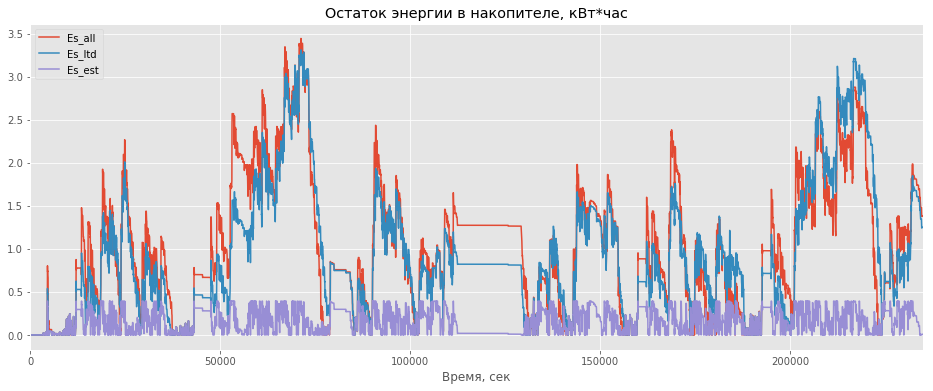

In [32]:
T_total = mds[mds.dEs_all!=0].dt.sum()
print("Общее время работы, {:,.0f} сек".format(T_total))
print("Доля времени в полном разряде {:.1%}".format( mds[mds.Es_est==0].dt.sum() / T_total ))
print("Доля времени в полном заряде  {:.1%}".format( mds[mds.Es_est==Es_max].dt.sum() / T_total ))

r = mds[['Es_all', 'Es_ltd', 'Es_est']] * E_k
r.plot(title="Остаток энергии в накопителе, {:s}".format(E_m), figsize=(16,6));
plt.xlabel("Время, сек");

Для максимального экономического эффекта, необходимо что бы устройство работало как можно чаще, так как доход возникает при отдаче энергии из накопителя 

### 5.1 Пиковые токи потребления и их сглаживание

Среднее значение тока потребления из сети (Iin - исходное, Iin_est - с накопителем энергии)
Iin       91.433
Iin_est   39.607
dtype: float64


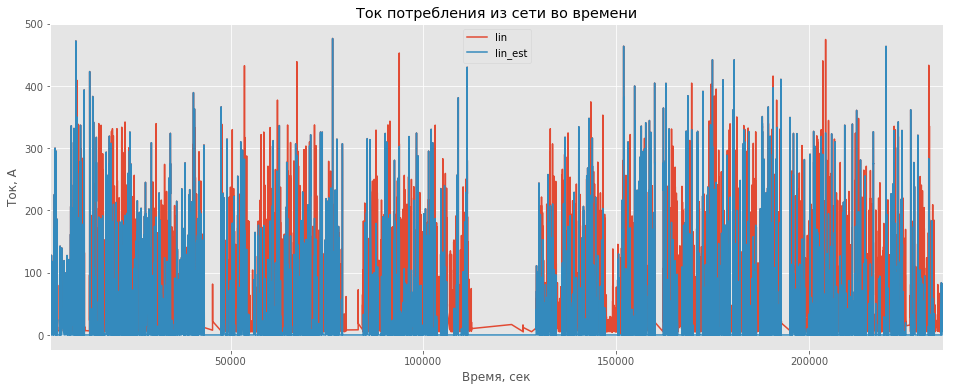

In [33]:
cond = mds.Iin > 0
r=mds[cond].copy()
print("Среднее значение тока потребления из сети (Iin - исходное, Iin_est - с накопителем энергии)")
print(r[['Iin', 'Iin_est']].mean())
r[['Iin', 'Iin_est']].plot(figsize=(16,6));
plt.title("Ток потребления из сети во времени");
plt.xlabel("Время, сек");
plt.ylabel("Ток, А");

** Выводы: **
- система рекуперации позволяет снизить средний ток потребления с 91 до 40 ампер
- пиковые токи потребления, при этом не меняются
- для сглаживания пиков необходим другой алгоритм управления который резервирует часть запасенной энергии для сглаживания возможных пиков

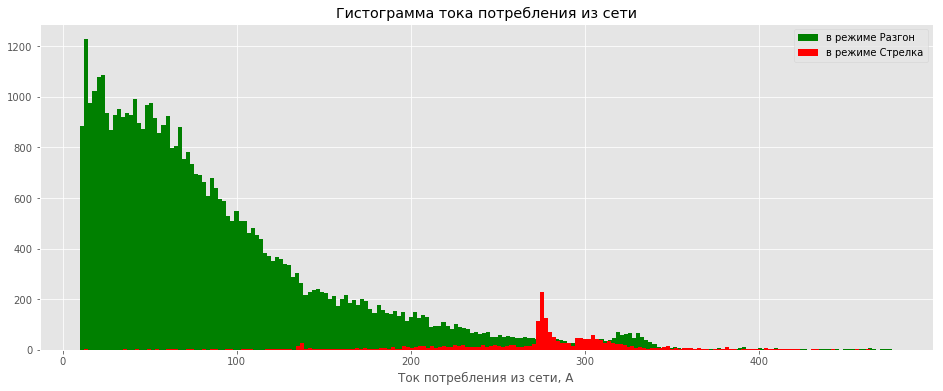

In [34]:
ds[(ds.strelka==0) & (ds.In>10)].Iin.hist(bins=200, label='в режиме Разгон', color='g', figsize=(16,6));
ds[(ds.strelka>0) & (ds.Iin>10)].Iin.hist(bins=200, label='в режиме Стрелка', color='r');
plt.xlabel("Ток потребления из сети, А");
plt.title("Гистограмма тока потребления из сети");
plt.legend();

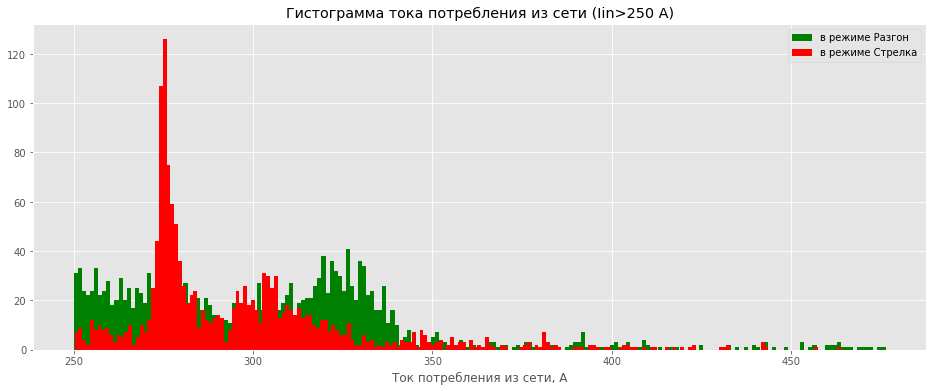

In [35]:
ds[(ds.strelka==0) & (ds.In>250)].Iin.hist(bins=200, label='в режиме Разгон', color='g', figsize=(16,6));
ds[(ds.strelka>0) & (ds.Iin>250)].Iin.hist(bins=200, label='в режиме Стрелка', color='r');
plt.xlabel("Ток потребления из сети, А");
plt.title("Гистограмма тока потребления из сети (Iin>250 А)");
plt.legend();

- Пиковые токи потребления (> 250 ампер) встречаются достаточно редко
- Система ориентированная исключительно на сглаживание пиковых токов будет иметь низкий коэффициен использования и меньшую экономическую эффективность

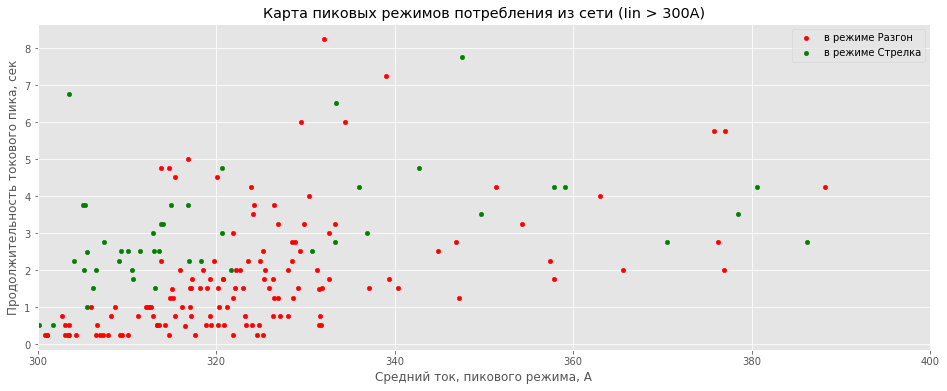

In [36]:
# Энергия потребления свыше границы Iin_max
Es_max, Cs, M_count, Us_max
Iin_max = 300
cond = (mds.Iin > Iin_max) #& (mds.strelka==0)
mds['dEe_ltd'] = (mds[cond].dEe - mds[cond].Uin * Iin_max * mds[cond].dt)
r = mds[cond].groupby(['Is_cycle','strelka']) \
             .agg({'dEe_ltd':'sum', 'tsec':'min', 'Iin':['mean','max'], 'dt':'sum', 'speed':'min'}) \
             .reset_index()
r.columns = ['Is_cycle', 'strelka', 'Ee_peak', 'tsec', 'Iin_mean', 'Iin_max', 'dt', 'speed']
r.Ee_peak = r.Ee_peak * E_k

ax = plt.subplot();
r[r.strelka==0].plot.scatter(x="Iin_mean", y='dt', c='r', ax=ax, label='в режиме Разгон', figsize=(16,6));
r[r.strelka!=0].plot.scatter(x="Iin_mean", y='dt', c='g', ax=ax, label='в режиме Стрелка');
plt.title("Карта пиковых режимов потребления из сети (Iin > {:,.0f}А)".format(Iin_max));
plt.xlim([Iin_max, 400]);
plt.xlabel("Средний ток, пикового режима, А");
plt.ylabel("Продолжительность токового пика, сек");

In [37]:
r[r.Ee_peak>0][['Is_cycle', 'Ee_peak', 'Iin_mean','Iin_max', 'dt', 'speed']].sort_values('Iin_mean', ascending=False).head(10) \
.style.format({'Iin_mean':'{:,.0f}', 'Iin_max':'{:,.0f}', 'dt':'{:,.1f}', 'Ee_peak':'{:,.2f}', 'speed':'{:,.0f}'})

In [38]:
Es_limit_flat = 0.09
Es_limit_speed = 18
Es_limit_k = 0.003

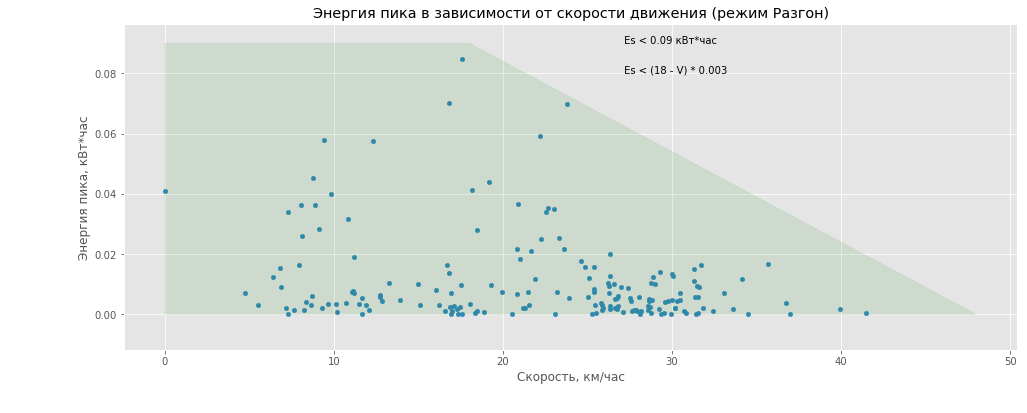

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.annotate("Область сохранения энергии для компенсации пиков", xy=(27,0.11))
ax.annotate("удовлетворяет неравенствам:", xy=(27,0.10))
ax.annotate(" Es < {:,.2f} кВт*час".format(Es_limit_flat), xy=(27,0.09))
ax.annotate(" Es < ({:.0f} - V) * {:.3f}".format(Es_limit_speed, Es_limit_k), xy=(27,0.08))
ax.add_patch(plt.Polygon([
        [Es_limit_speed+Es_limit_flat/Es_limit_k,0],
        [18,Es_limit_flat],
        [0,Es_limit_flat],
        [0,0]
    ], color='g', alpha=0.1))
r.plot.scatter(x='speed', y='Ee_peak', figsize=(16,6), ax=ax);
plt.xlabel("Скорость, км/час");
plt.ylabel("Энергия пика, " + E_m);
plt.title("Энергия пика в зависимости от скорости движения (режим Разгон)");

- С увеличением скорости движения, уменьшается запас энергии который необходимый для сглаживания пика

### 5.2 Алгоритм управления накопителем для сглаживания пиков

In [40]:
Iin_limit = Iin_max

In [41]:
# Алгоритм управления 2
# Если не в зоне пика, то используем энергию настолько, что бы оставался запас для компенсации пиков
# Если в зоне пика, то выдаем столько сколько нужно
def calc_dEs():
    global dEs_est, Es_est, Iin, Udt, speed, save_mode
    
    if dEs_est > 0: return dEs_est  # В режиме зарядки потребляем все
    if Iin > Iin_limit:   return -(Iin - Iin_limit) * Udt  # Если ток компенсируем энергию превышения
    
    Es_limit = Es_limit_flat - (speed - Es_limit_speed) * Es_limit_k
    if Es_limit > Es_limit_flat: Es_limit = Es_limit_flat
    Es_limit *= 3600 * 1000 
    if Es_est + dEs_est >= Es_limit: return dEs_est 
    
    save_mode += 1
    dEs_est_old = dEs_est
    if Es_est < Es_limit: 
        dEs_est = 0
    else:
        dEs_est = Es_limit - Es_est
    
    log.append({'Es_est':Es_est, 'Es_limit':Es_limit, 'speed':speed, 'dEs_est':dEs_est, 
                'Iin':Iin, 'dEs_ltd': dEs_est_old})
    return dEs_est

log = []
save_mode = 0
calc_mds(calc_dEs)
print("Рассчитано. Ограничение использования запасенной энергии применялось", save_mode, "раз")
Es_out_total1 = -mds[mds.dEs_est<0].dEs_est.sum()
print("Возвращено энергии из накопителя {:,.0f} {:s}".format( Es_out_total1 * E_k, E_m))
print("Снижение эффективности {:.0%}".format((Es_out_total - Es_out_total1)/Es_out_total))

Рассчитано. Ограничение использования запасенной энергии применялось 29840 раз
Возвращено энергии из накопителя 110 кВт*час
Снижение эффективности 16%


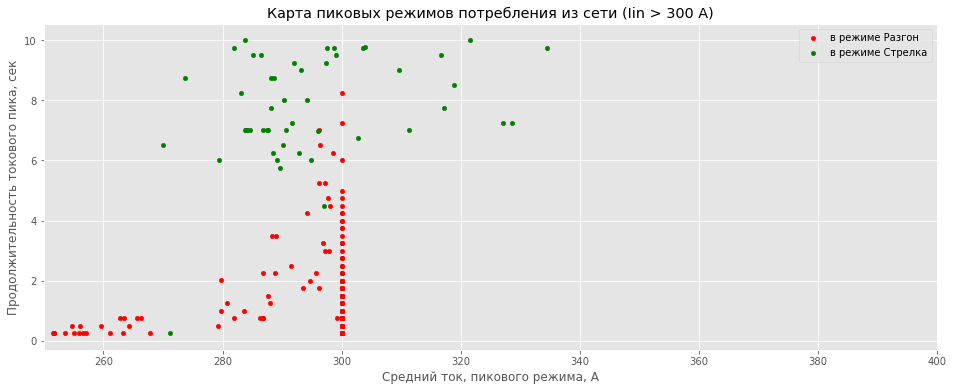

In [42]:
# Энергия потребления свыше границы Iin_max
Es_max, Cs, M_count, Us_max
cond = (mds.Iin_est >= Iin_limit) #& (mds.strelka==0)
mds['dEe_peak'] = (mds[cond].dEe - mds[cond].Uin * Iin_limit * mds[cond].dt)
r = mds[mds.Iin_est > (Iin_limit-50)].groupby(['Is_cycle','strelka']) \
    .agg({'dEe_peak':'sum', 'tsec':'min', 'Iin_est':['mean','max'], 'dt':'sum', 'speed':'min', 'Es_est': 'last'}) \
    .reset_index()
r.columns = ['Is_cycle', 'strelka', 'Ee_peak', 'tsec', 'Iin_mean', 'Iin_max', 'dt', 'speed', 'Es_est_last']
r.Ee_peak *= E_k
r.Es_est_last *= E_k 

ax = plt.subplot();
r[r.strelka==0].plot.scatter(x="Iin_mean", y='dt', c='r', ax=ax, label='в режиме Разгон', figsize=(16,6));
r[r.strelka!=0].plot.scatter(x="Iin_mean", y='dt', c='g', ax=ax, label='в режиме Стрелка');
plt.title("Карта пиковых режимов потребления из сети (Iin > {:,.0f} А)".format(Iin_max));
plt.xlabel("Средний ток, пикового режима, А");
plt.ylabel("Продолжительность токового пика, сек");
plt.xlim([Iin_limit-50, 400]);

** Таблица: Пики с наибольшими средними токами (Топ 10) **

Поля таблицы:
* Is_cycle - номер рабочего цикла
* Ee_peak - энергия, необходимая для полного сглаживания пика, кВт*час
* Iin_mean - среднее значение тока потребления из сети внутри одного пика, А 
* Iin_max - максимальное моментальное значение тока потребления из сети внутри одного пика, А 
* dt - продолжительность пика, сек
* speed - скорость (км/час) начиная с которой фиксируется пик
* Es_est_last - остаток энергии в накопителе после сглаживания пика

в выборке считаются показатели только для записей, где In_est >= Iin_limit

In [43]:
cond = (r.Ee_peak>0) & (r.strelka==0) 
r[cond][['Is_cycle', 'strelka', 'Ee_peak', 'Iin_mean','Iin_max', 'dt', 'speed', 'Es_est_last']] \
.sort_values('Iin_mean', ascending=False).head(10) \
.style.format({'Iin_mean':'{:,.0f}', 'Iin_max':'{:,.0f}', 'dt':'{:,.1f}', 'dEe_ltd':'{:,.2f}', 'speed':'{:,.0f}', 
               'Ee_peak':'{:.4f}', 'Es_est_last':'{:.4f}'})

In [44]:
print("Расшифровка цикла по записям")
cols = ['Is_cycle','strelka', 'speed', 'In', 'Iin', 'Iin_est', 'Is_est', 'Es_est', 'dEs_est', 'dEn']
show( mds[:][mds.Is_cycle==6592][cols] )
#mds[(mds.dEn>0) & (mds.Is_est>-149) & (mds.Es_est>0) & (mds.dEn+mds.dEs_ltd>10000) & (mds.dEs_est<0)][cols]

Расшифровка цикла по записям


In [45]:
print("Примеры случаев ограничения возвращаемой энергии")
l = pd.DataFrame(log)
show( l[(l.speed>0) & (l.Iin > Iin_limit-1)].head(10) )

Примеры случаев ограничения возвращаемой энергии


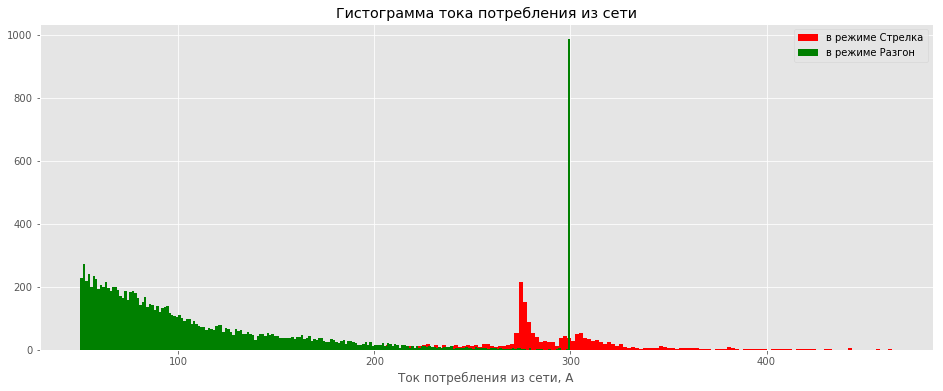

In [46]:
mds[(mds.strelka>0)  & (mds.Iin_est > Iin_limit-250)].Iin_est.hist(bins=200, label='в режиме Стрелка', color='r');
mds[(mds.strelka==0) & (mds.Iin_est > Iin_limit-250)].Iin_est.hist(bins=200, label='в режиме Разгон', color='g', figsize=(16,6));
plt.xlabel("Ток потребления из сети, А");
plt.title("Гистограмма тока потребления из сети");
plt.legend();

**Выводы:**
- Энергия пиков, которую необходимо компенсировать составляет менее 20% от энергии накопителя (0.5 кВт*час)
- Использование алгоритма для сглаживания пиков приведет к снижению ожидаемого экономического эффекта на 15%

## 6. Расчет тепловыделения на полупроводниках

In [47]:
dUvd = 2   # Падение напряжения на диоде, В
dUvt = 2   # Падение напряжения на открытом ключе, В
F = 10000   # Частота инвертора, Гц
Qvt = 0.05 # Полные потери транзисторного ключа на переключение, Дж

In [48]:
d = mds[mds.Iin_est>0]
Win = (d.Iin_est * d.dt * dUvd).sum()
print("Потери на диоде на вводе из сети          {:,.2f} {:s}".format(Win * E_k, E_m))

d = mds[mds.Is_est<0]
Wsout = -(d.Is_est * d.dt * dUvd).sum()
print("Потери на диоде на выходе накопителя      {:,.2f} {:s}".format(Wsout * E_k, E_m))

d = mds[mds.Is_est>0]
Wvts1 = F * Qvt * d.dt.sum()
print("Потери на переключение ключа при зарядке  {:,.2f} {:s}".format(Wvts1 * E_k, E_m))
Wvtc1 = (d.Is_est * d.dt * dUvt).sum()
print("Потери на переходе ключа при зарядке      {:,.2f} {:s}".format(Wvtc1 * E_k, E_m))

d = mds[mds.Is_est<0]
Wvts2 = F * Qvt * d.dt.sum()
print("Потери на переключение ключа при разрядке {:,.2f} {:s}".format(Wvts2 * E_k, E_m))
Wvtc2 = -(d.Is_est * d.dt * dUvt).sum()
print("Потери на переходе ключа при разрядке     {:,.2f} {:s}".format(Wvtc2 * E_k, E_m))

W = Win + Wsout + Wvts1 + Wvtc1 + Wvts2 + Wvtc2
print("Потери всего {:,.1f} {:s}, средняя мощность тепловыделения {:,.0f} Вт".format(W * E_k, E_m, W/mds.dt.sum()))

Потери на диоде на вводе из сети          0.30 кВт*час
Потери на диоде на выходе накопителя      0.36 кВт*час
Потери на переключение ключа при зарядке  0.88 кВт*час
Потери на переходе ключа при зарядке      0.33 кВт*час
Потери на переключение ключа при разрядке 1.47 кВт*час
Потери на переходе ключа при разрядке     0.36 кВт*час
Потери всего 3.7 кВт*час, средняя мощность тепловыделения 198 Вт


## 7. Оценка размера рынка

In [49]:
Revenue = Ee_revenue 
print("Доход от всех трамваев Москвы           {:8,.1f} млн.руб/год".format(Ee_revenue * 800 / 10**6));
print("Доход от всех трамваев Москвы и Питера  {:8,.1f} млн.руб/год".format(Ee_revenue * (800+1000) / 10**6 ));
print("Доход от всех трамваев России           {:8,.1f} млн.руб/год".format(Ee_revenue * 12000  / 10**6));

Доход от всех трамваев Москвы              140.3 млн.руб/год
Доход от всех трамваев Москвы и Питера     315.6 млн.руб/год
Доход от всех трамваев России            2,103.9 млн.руб/год
